<a href="https://colab.research.google.com/github/Vincent-Kwan/Safe-Roads-Competition/blob/master/TTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TTC_Municipal_Vehicle.csv')

In [61]:
df.head(15)

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,Month,Season
0,-8.844227e+06,5.410873e+06,5229859,1100239,2009,2009-04-20 04:00:00+00:00,1330,13,RONCESVALLES AVE,HIGH PARK BLVD,<Null>,Minor Arterial,Toronto and East York,4,11,43.646327,-79.449046,Intersection,<Null>,Traffic Signal,Rain,Daylight,Wet,Fatal,Pedestrian Collisions,Pedestrian,85 to 89,Fatal,13,West,Other,<Null>,<Null>,<Null>,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Normal,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,86,Roncesvalles (86),1,4,Summer
1,-8.844227e+06,5.410873e+06,5229860,1100239,2009,2009-04-20 04:00:00+00:00,1330,13,RONCESVALLES AVE,HIGH PARK BLVD,<Null>,Minor Arterial,Toronto and East York,4,11,43.646327,-79.449046,Intersection,<Null>,Traffic Signal,Rain,Daylight,Wet,Fatal,Pedestrian Collisions,Vehicle Owner,unknown,<Null>,<Null>,<Null>,Other,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,86,Roncesvalles (86),2,4,Summer
2,-8.844227e+06,5.410873e+06,5229861,1100239,2009,2009-04-20 04:00:00+00:00,1330,13,RONCESVALLES AVE,HIGH PARK BLVD,<Null>,Minor Arterial,Toronto and East York,4,11,43.646327,-79.449046,Intersection,<Null>,Traffic Signal,Rain,Daylight,Wet,Fatal,Pedestrian Collisions,Driver,40 to 44,None,<Null>,East,Municipal Transit Bus (TTC),Turning Left,Failed to Yield Right of Way,Inattentive,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,86,Roncesvalles (86),3,4,Summer
3,-8.821234e+06,5.433471e+06,5792490,1111945,2009,2009-06-30 04:00:00+00:00,1930,19,5050 SHEPPARD AVE E,<Null>,<Null>,Major Arterial,Scarborough,23,42,43.793045,-79.242490,Mid-Block,<Null>,No Control,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Vehicle Owner,unknown,<Null>,<Null>,<Null>,Other,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D42,128,Agincourt South-Malvern West (128),4,6,Summer
4,-8.821234e+06,5.433471e+06,5792491,1111945,2009,2009-06-30 04:00:00+00:00,1930,19,5050 SHEPPARD AVE E,<Null>,<Null>,Major Arterial,Scarborough,23,42,43.793045,-79.242490,Mid-Block,<Null>,No Control,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,50 to 54,None,<Null>,East,Municipal Transit Bus (TTC),Turning Left,Failed to Yield Right of Way,Inattentive,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D42,128,Agincourt South-Malvern West (128),5,6,Summer
5,-8.821234e+06,5.433471e+06,5792492,1111945,2009,2009-06-30 04:00:00+00:00,1930,19,5050 SHEPPARD AVE E,<Null>,<Null>,Major Arterial,Scarborough,23,42,43.793045,-79.242490,Mid-Block,<Null>,No Control,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,70 to 74,Fatal,24,East,Other,<Null>,<Null>,<Null>,Pedestrian involved in a collision with transi...,On Sidewalk or Shoulder,Normal,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D42,128,Agincourt South-Malvern West (128),6,6,Summer
6,-8.838677e+06,5.412337e+06,5807803,1122417,2009,2009-09-01 04:00:00+00:00,1203,12,SPADINA AVE,NASSAU ST,<Null>,Major Arterial,Toronto and East York,11,"52,14",43.655845,-79.399190,Intersection,<Null>,Traffic Signal,Clear,Daylight,Dry,Fatal,Cyclist Collisions,Driver,45 to 49,None,<Null>,South,Municipal Transit Bus (TTC),Going Ahea

In [5]:
df.shape

(1011, 57)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                1011 non-null   float64
 1   Y                1011 non-null   float64
 2   INDEX_           1011 non-null   int64  
 3   ACCNUM           1011 non-null   int64  
 4   YEAR             1011 non-null   int64  
 5   DATE             1011 non-null   object 
 6   TIME             1011 non-null   int64  
 7   HOUR             1011 non-null   int64  
 8   STREET1          1011 non-null   object 
 9   STREET2          1011 non-null   object 
 10  OFFSET           1011 non-null   object 
 11  ROAD_CLASS       1011 non-null   object 
 12  DISTRICT         1011 non-null   object 
 13  WARDNUM          1011 non-null   object 
 14  DIVISION         1011 non-null   object 
 15  LATITUDE         1011 non-null   float64
 16  LONGITUDE        1011 non-null   float64
 17  LOCCOORD      

In [12]:
df.describe()

,X,Y,INDEX_,ACCNUM,YEAR,TIME,HOUR,LATITUDE,LONGITUDE,HOOD_ID,ObjectId
count,1.011000e+03,1.011000e+03,1.011000e+03,1.011000e+03,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,-8.839268e+06,5.419132e+06,3.282094e+07,2.082214e+09,2012.479723,1263.544016,12.348170,43.699967,-79.404498,74.078140,506.000000
std,1.071325e+04,8.721848e+03,3.578327e+07,3.171182e+09,3.818187,625.433381,6.292023,0.056629,0.096239,38.210553,291.994863
min,-8.863020e+06,5.402603e+06,3.370695e+06,1.362700e+05,2006.000000,0.000000,0.000000,43.592545,-79.617862,1.000000,1.000000
25%,-8.845184e+06,5.412183e+06,6.150244e+06,1.149558e+06,2010.000000,847.500000,8.000000,43.654845,-79.457637,43.000000,253.500000
50%,-8.838893e+06,5.416530e+06,7.477448e+06,1.305424e+06,2012.000000,1352.000000,13.000000,43.683093,-79.401126,78.000000,506.000000
75%,-8.833032e+06,5.425819e+06,8.052851e+07,5.000221e+09,2015.000000,1734.000000,17.000000,43.743407,-79.348476,96.500000,758.500000
max,-8.815044e+06,5.440189e+06,8.151169e+07,9.002463e+09,2020.000000,2334.000000,23.000000,43.836589,-79.186890,140.000000,1011.000000


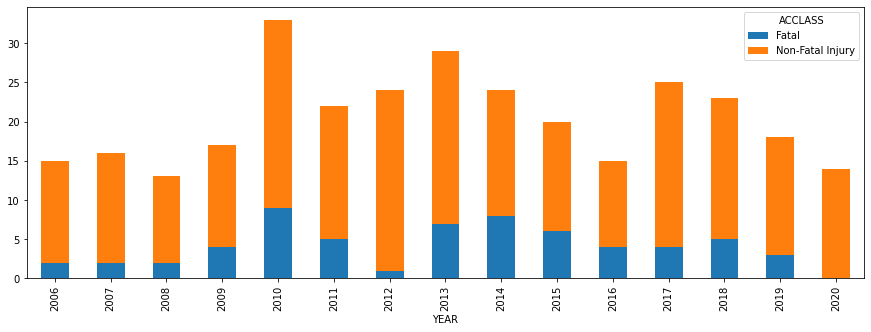

In [23]:
df.groupby(['YEAR','ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind='bar', stacked=True,figsize=(15, 5))


In [36]:
injury_over_years = df.groupby(['YEAR','ACCLASS'])['ACCNUM'].nunique()
injury_over_years.groupby(level=[0]).apply(lambda g: 100* g / g.sum()).round(2)

YEAR  ACCLASS         
2006  Fatal                13.33
      Non-Fatal Injury     86.67
2007  Fatal                12.50
      Non-Fatal Injury     87.50
2008  Fatal                15.38
      Non-Fatal Injury     84.62
2009  Fatal                23.53
      Non-Fatal Injury     76.47
2010  Fatal                27.27
      Non-Fatal Injury     72.73
2011  Fatal                22.73
      Non-Fatal Injury     77.27
2012  Fatal                 4.17
      Non-Fatal Injury     95.83
2013  Fatal                24.14
      Non-Fatal Injury     75.86
2014  Fatal                33.33
      Non-Fatal Injury     66.67
2015  Fatal                30.00
      Non-Fatal Injury     70.00
2016  Fatal                26.67
      Non-Fatal Injury     73.33
2017  Fatal                16.00
      Non-Fatal Injury     84.00
2018  Fatal                21.74
      Non-Fatal Injury     78.26
2019  Fatal                16.67
      Non-Fatal Injury     83.33
2020  Non-Fatal Injury    100.00
Name: ACCNUM, dtype:

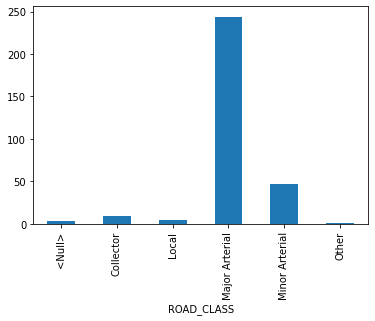

In [37]:
df.groupby('ROAD_CLASS')['ACCNUM'].nunique().plot(kind='bar')

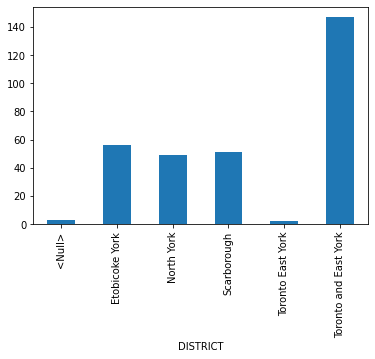

In [38]:
df.groupby('DISTRICT')['ACCNUM'].nunique().plot(kind='bar')

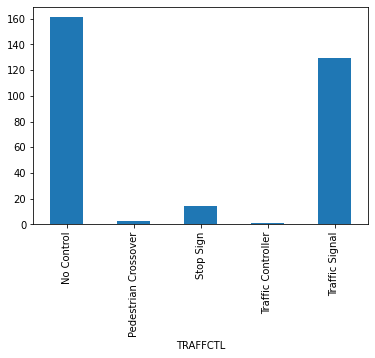

In [39]:
df.groupby('TRAFFCTL')['ACCNUM'].nunique().plot(kind='bar')

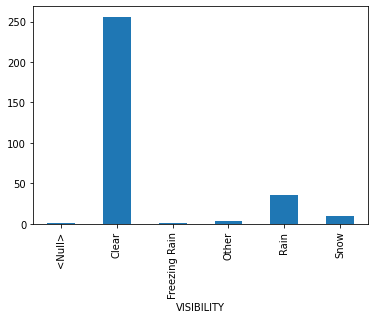

In [40]:
df.groupby('VISIBILITY')['ACCNUM'].nunique().plot(kind='bar')

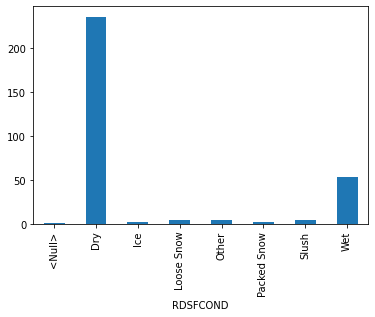

In [41]:
df.groupby('RDSFCOND')['ACCNUM'].nunique().plot(kind='bar')

In [43]:
#converting date column to datetime and saving month in new column
df['DATE'] = pd.to_datetime(df['DATE'])
df['Month'] = df['DATE'].dt.month

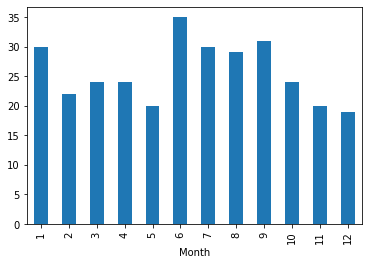

In [46]:
df.groupby('Month')['ACCNUM'].nunique().plot(kind='bar')

In [51]:
#Dividing data into two seasons
df['Season'] = ['Summer' if 4 <= x <= 11 else 'Winter' for x in df['Month'] ]

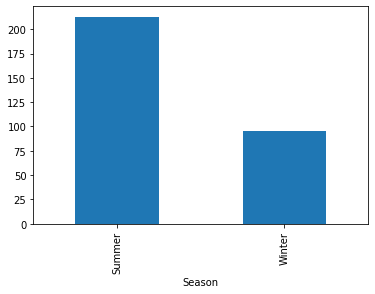

In [50]:
df.groupby('Season')['ACCNUM'].nunique().plot(kind='bar')

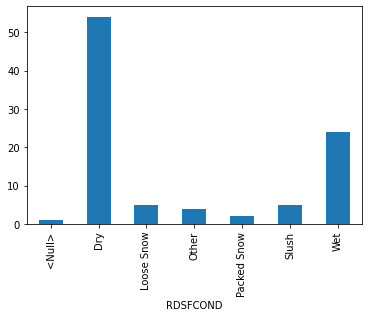

In [53]:
df[df['Season'] == 'Winter'].groupby('RDSFCOND')['ACCNUM'].nunique().plot(kind='bar')

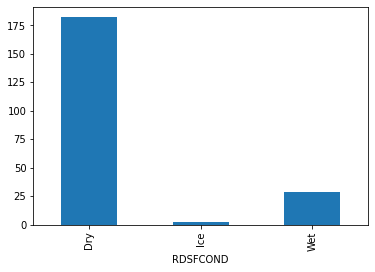

In [54]:
df[df['Season'] == 'Summer'].groupby('RDSFCOND')['ACCNUM'].nunique().plot(kind='bar')

In [58]:
df.IMPACTYPE.unique()

array(['Pedestrian Collisions', 'Cyclist Collisions', 'Turning Movement',
       'Rear End', 'Angle', 'SMV Other', 'Other', 'Approaching',
       'Sideswipe'], dtype=object)

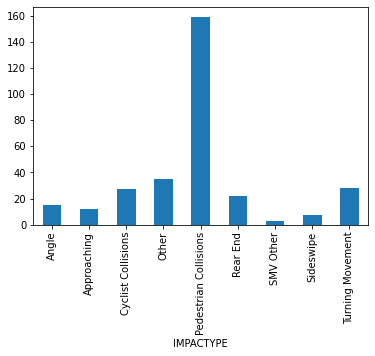

In [59]:
df.groupby('IMPACTYPE')['ACCNUM'].nunique().plot(kind='bar')

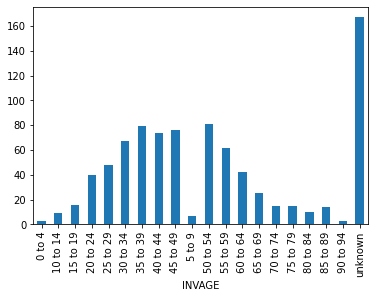

In [60]:
df.groupby('INVAGE')['ACCNUM'].nunique().plot(kind='bar')

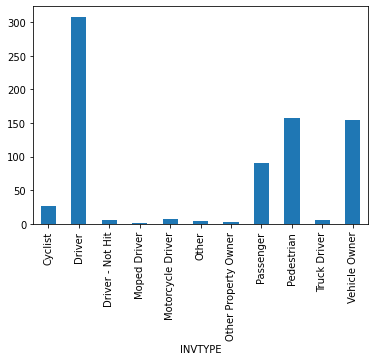

In [62]:
df.groupby('INVTYPE')['ACCNUM'].nunique().plot(kind='bar')

In [65]:
#How to analyse these two varaibles?
df[['INITDIR', 'MANOEUVER']]

,INITDIR,MANOEUVER
0,West,<Null>
1,<Null>,<Null>
2,East,Turning Left
3,<Null>,<Null>
4,East,Turning Left
...,...,...
1006,North,Going Ahead
1007,South,Slowing or Stopping
1008,<Null>,<Null>
1009,West,Going Ahead


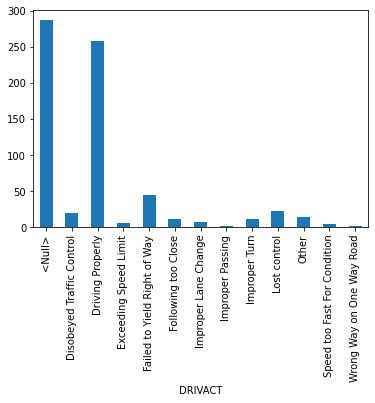

In [68]:
df.groupby('DRIVACT')['ACCNUM'].nunique().plot(kind='bar')

In [78]:
df[df['DRIVACT'] == 'Driving Properly'].groupby('IMPACTYPE')['ACCNUM'].count()

IMPACTYPE
Angle                     18
Approaching               15
Cyclist Collisions        24
Other                     34
Pedestrian Collisions    124
Rear End                  25
SMV Other                  2
Sideswipe                  8
Turning Movement          31
Name: ACCNUM, dtype: int64

In [79]:
df[df['DRIVACT'] == 'Failed to Yield Right of Way'].groupby('IMPACTYPE')['ACCNUM'].count()

IMPACTYPE
Angle                     1
Cyclist Collisions        3
Pedestrian Collisions    29
Sideswipe                 1
Turning Movement         11
Name: ACCNUM, dtype: int64